In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random
import math
import time
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("mnist/", one_hot=True)

/opt/conda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)
/opt/conda/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Extracting mnist/train-images-idx3-ubyte.gz
Extracting mnist/train-labels-idx1-ubyte.gz
Extracting mnist/t10k-images-idx3-ubyte.gz
Extracting mnist/t10k-labels-idx1-ubyte.gz


In [2]:
num_train=mnist.train.num_examples
num_val=mnist.validation.images.shape
num_test=mnist.test.images.shape

# 1. Baseline: CNN

In [3]:
X=tf.placeholder(dtype=tf.float32,shape=[None,28,28,1],name='X')
y=tf.placeholder(dtype=tf.int64,shape=[None,10],name='y')
is_training=tf.placeholder(dtype=tf.bool,name='is_training')
cnn_out1=tf.layers.conv2d(X,128,kernel_size=3,strides=(1, 1),padding='same')
bn_out1=tf.layers.batch_normalization(cnn_out1,axis=3,training=is_training)
relu_out1=tf.nn.relu(bn_out1)
pool_out1=tf.layers.max_pooling2d(relu_out1,[2,2],[2,2])
cnn_out2=tf.layers.conv2d(pool_out1,128,kernel_size=3,strides=(1, 1),padding='same')
bn_out2=tf.layers.batch_normalization(cnn_out2,axis=3,training=is_training)
relu_out1=tf.nn.relu(bn_out2)
pool_out2=tf.layers.max_pooling2d(relu_out1,[2,2],[2,2])
flt=tf.layers.flatten(pool_out2)
out1=tf.layers.dense(flt,1024)
# bn_out3=tf.layers.batch_normalization(out1,axis=1,training=is_training)
out2=tf.nn.relu(out1)
score=tf.layers.dense(out2,10)
predictions = tf.argmax(score, 1)
correct_predictions = tf.equal(predictions, tf.argmax(y,1))
accuracy = tf.reduce_mean(tf.cast(correct_predictions, "float"))

loss=tf.losses.softmax_cross_entropy(onehot_labels=y,logits=score)
optimizier=tf.train.AdamOptimizer(learning_rate=1e-6)
train_step = optimizier.minimize(loss)

In [4]:
max_epoch=50
batch_size=8
print_every=625

def train():
    num_iteration=num_train//batch_size
    for it in range(num_iteration):
        images,labels=mnist.train.next_batch(batch_size)
        loss_num,_ = sess.run([loss,train_step],feed_dict={X:images.reshape(-1,28,28,1),y:labels,is_training:True})
        if it==0 or (it+1)%print_every==0 or it==num_iteration-1:
            print(time.strftime('%Y-%m-%d %H:%M:%S',time.localtime(time.time())),
                  'iteration %d/%d:' % (it+1,num_iteration),'current training loss = %f' % (loss_num))
            
def eval(dataset,num_iteration):
    total_loss=0
    total_accuracy=0
    for it in range(num_iteration):
        images,labels=dataset.next_batch(batch_size)
        loss_num,accuracy_num = sess.run([loss,accuracy],feed_dict={X:images.reshape(-1,28,28,1),y:labels,is_training:False})
        total_loss+=loss_num
        total_accuracy+=accuracy_num
    total_loss/=num_iteration
    total_accuracy/=num_iteration
    return total_loss,total_accuracy
    
acc_train_his=[]
acc_val_his=[]
acc_test_his=[]
    
with tf.Session() as sess:
    tf.global_variables_initializer().run()
    for epoch in range(max_epoch):
        print(time.strftime('%Y-%m-%d %H:%M:%S',time.localtime(time.time())),'start epoch %d/%d:' % (epoch+1,max_epoch))
        train()
        loss_train,acc_train=eval(mnist.train,2000)
        loss_val,acc_val=eval(mnist.validation,500)
        loss_test,acc_test=eval(mnist.test,1000)
        acc_train_his.append(acc_train)
        acc_val_his.append(acc_val)
        acc_test_his.append(acc_test)
        print(time.strftime('%Y-%m-%d %H:%M:%S',time.localtime(time.time())),'end epoch %d/%d:' % (epoch+1,max_epoch),
             'acc_train=%.3f%% acc_val=%.3f%% acc_test=%.3f%%' % (acc_train*100.0,acc_val*100.0,acc_test*100.0))

2018-04-13 14:22:25 start epoch 1/50:
2018-04-13 14:22:27 iteration 1/6875: current training loss = 2.496820
2018-04-13 14:22:29 iteration 625/6875: current training loss = 1.081113
2018-04-13 14:22:32 iteration 1250/6875: current training loss = 0.475402
2018-04-13 14:22:34 iteration 1875/6875: current training loss = 0.558688
2018-04-13 14:22:37 iteration 2500/6875: current training loss = 0.203625
2018-04-13 14:22:39 iteration 3125/6875: current training loss = 0.416182
2018-04-13 14:22:42 iteration 3750/6875: current training loss = 0.148532
2018-04-13 14:22:44 iteration 4375/6875: current training loss = 0.100706
2018-04-13 14:22:47 iteration 5000/6875: current training loss = 0.697870
2018-04-13 14:22:49 iteration 5625/6875: current training loss = 0.105114
2018-04-13 14:22:52 iteration 6250/6875: current training loss = 0.174963
2018-04-13 14:22:55 iteration 6875/6875: current training loss = 0.521361
2018-04-13 14:23:02 end epoch 1/50: acc_train=81.794% acc_val=83.175% acc_test

2018-04-13 14:26:56 iteration 1250/6875: current training loss = 0.005832
2018-04-13 14:26:58 iteration 1875/6875: current training loss = 0.017695
2018-04-13 14:27:01 iteration 2500/6875: current training loss = 0.009931
2018-04-13 14:27:03 iteration 3125/6875: current training loss = 0.014724
2018-04-13 14:27:05 iteration 3750/6875: current training loss = 0.004046
2018-04-13 14:27:08 iteration 4375/6875: current training loss = 0.003921
2018-04-13 14:27:10 iteration 5000/6875: current training loss = 0.035541
2018-04-13 14:27:12 iteration 5625/6875: current training loss = 0.005573
2018-04-13 14:27:15 iteration 6250/6875: current training loss = 0.044476
2018-04-13 14:27:17 iteration 6875/6875: current training loss = 0.004140
2018-04-13 14:27:23 end epoch 9/50: acc_train=96.506% acc_val=96.675% acc_test=96.250%
2018-04-13 14:27:23 start epoch 10/50:
2018-04-13 14:27:23 iteration 1/6875: current training loss = 0.172007
2018-04-13 14:27:25 iteration 625/6875: current training loss =

2018-04-13 14:31:29 iteration 2500/6875: current training loss = 0.001194
2018-04-13 14:31:32 iteration 3125/6875: current training loss = 0.064488
2018-04-13 14:31:34 iteration 3750/6875: current training loss = 0.012540
2018-04-13 14:31:37 iteration 4375/6875: current training loss = 0.002128
2018-04-13 14:31:40 iteration 5000/6875: current training loss = 0.006273
2018-04-13 14:31:42 iteration 5625/6875: current training loss = 0.027493
2018-04-13 14:31:45 iteration 6250/6875: current training loss = 0.000646
2018-04-13 14:31:47 iteration 6875/6875: current training loss = 0.028626
2018-04-13 14:31:53 end epoch 17/50: acc_train=97.756% acc_val=97.700% acc_test=97.513%
2018-04-13 14:31:53 start epoch 18/50:
2018-04-13 14:31:53 iteration 1/6875: current training loss = 0.000357
2018-04-13 14:31:55 iteration 625/6875: current training loss = 0.003706
2018-04-13 14:31:58 iteration 1250/6875: current training loss = 0.000887
2018-04-13 14:32:00 iteration 1875/6875: current training loss 

2018-04-13 14:35:51 iteration 3750/6875: current training loss = 0.002139
2018-04-13 14:35:54 iteration 4375/6875: current training loss = 0.004677
2018-04-13 14:35:56 iteration 5000/6875: current training loss = 0.000437
2018-04-13 14:35:58 iteration 5625/6875: current training loss = 0.013360
2018-04-13 14:36:01 iteration 6250/6875: current training loss = 0.041612
2018-04-13 14:36:03 iteration 6875/6875: current training loss = 0.004738
2018-04-13 14:36:09 end epoch 25/50: acc_train=98.188% acc_val=98.125% acc_test=97.862%
2018-04-13 14:36:09 start epoch 26/50:
2018-04-13 14:36:09 iteration 1/6875: current training loss = 0.000549
2018-04-13 14:36:12 iteration 625/6875: current training loss = 0.012672
2018-04-13 14:36:14 iteration 1250/6875: current training loss = 0.001151
2018-04-13 14:36:17 iteration 1875/6875: current training loss = 0.004615
2018-04-13 14:36:19 iteration 2500/6875: current training loss = 0.000249
2018-04-13 14:36:22 iteration 3125/6875: current training loss 

2018-04-13 14:40:16 iteration 5000/6875: current training loss = 0.000394
2018-04-13 14:40:19 iteration 5625/6875: current training loss = 0.000115
2018-04-13 14:40:21 iteration 6250/6875: current training loss = 0.001934
2018-04-13 14:40:24 iteration 6875/6875: current training loss = 0.003934
2018-04-13 14:40:30 end epoch 33/50: acc_train=97.662% acc_val=97.475% acc_test=97.375%
2018-04-13 14:40:30 start epoch 34/50:
2018-04-13 14:40:30 iteration 1/6875: current training loss = 0.024032
2018-04-13 14:40:32 iteration 625/6875: current training loss = 0.011175
2018-04-13 14:40:34 iteration 1250/6875: current training loss = 0.001976
2018-04-13 14:40:37 iteration 1875/6875: current training loss = 0.001416
2018-04-13 14:40:39 iteration 2500/6875: current training loss = 0.001149
2018-04-13 14:40:41 iteration 3125/6875: current training loss = 0.067955
2018-04-13 14:40:44 iteration 3750/6875: current training loss = 0.001565
2018-04-13 14:40:46 iteration 4375/6875: current training loss 

2018-04-13 14:44:50 iteration 6250/6875: current training loss = 0.000060
2018-04-13 14:44:52 iteration 6875/6875: current training loss = 0.000382
2018-04-13 14:44:59 end epoch 41/50: acc_train=96.956% acc_val=96.900% acc_test=96.350%
2018-04-13 14:44:59 start epoch 42/50:
2018-04-13 14:44:59 iteration 1/6875: current training loss = 0.000237
2018-04-13 14:45:01 iteration 625/6875: current training loss = 0.001052
2018-04-13 14:45:04 iteration 1250/6875: current training loss = 0.000064
2018-04-13 14:45:07 iteration 1875/6875: current training loss = 0.000188
2018-04-13 14:45:09 iteration 2500/6875: current training loss = 0.000979
2018-04-13 14:45:12 iteration 3125/6875: current training loss = 0.000924
2018-04-13 14:45:14 iteration 3750/6875: current training loss = 0.000034
2018-04-13 14:45:17 iteration 4375/6875: current training loss = 0.003968
2018-04-13 14:45:19 iteration 5000/6875: current training loss = 0.000298
2018-04-13 14:45:22 iteration 5625/6875: current training loss 

2018-04-13 14:49:34 end epoch 49/50: acc_train=94.819% acc_val=94.975% acc_test=94.350%
2018-04-13 14:49:34 start epoch 50/50:
2018-04-13 14:49:34 iteration 1/6875: current training loss = 0.000124
2018-04-13 14:49:37 iteration 625/6875: current training loss = 0.000009
2018-04-13 14:49:39 iteration 1250/6875: current training loss = 0.000018
2018-04-13 14:49:42 iteration 1875/6875: current training loss = 0.000174
2018-04-13 14:49:44 iteration 2500/6875: current training loss = 0.000576
2018-04-13 14:49:47 iteration 3125/6875: current training loss = 0.000214
2018-04-13 14:49:49 iteration 3750/6875: current training loss = 0.000029
2018-04-13 14:49:51 iteration 4375/6875: current training loss = 0.001677
2018-04-13 14:49:54 iteration 5000/6875: current training loss = 0.003341
2018-04-13 14:49:57 iteration 5625/6875: current training loss = 0.001035
2018-04-13 14:49:59 iteration 6250/6875: current training loss = 0.000051
2018-04-13 14:50:02 iteration 6875/6875: current training loss 

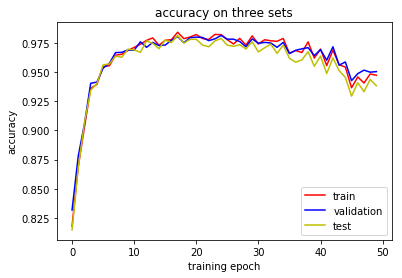

In [5]:
plt.figure(1)
ptr,=plt.plot(range(max_epoch),acc_train_his,'r-')
pva,=plt.plot(range(max_epoch),acc_val_his,'b-')
pte,=plt.plot(range(max_epoch),acc_test_his,'y-')
plt.xlabel('training epoch')
plt.ylabel('accuracy')
plt.title('accuracy on three sets')
plt.legend((ptr,pva,pte),('train','validation','test'))
plt.show()

# 2. Soft attention method

In [6]:
batch_size=64
img_size=28
RNN_unit=img_size*img_size
N_watch=10

In [7]:
tf.reset_default_graph()
X=tf.placeholder(dtype=tf.float32,shape=[None,img_size*img_size])
y=tf.placeholder(dtype=tf.int64,shape=[None,10])

predict_net=tf.layers.Dense(units=10)

def get_next_input(output, i):
    attention_weight=tf.nn.softmax(output)
    weighted_graph=X*attention_weight
    return weighted_graph

lstm_cell = tf.nn.rnn_cell.LSTMCell(RNN_unit, state_is_tuple=True)
init_state = lstm_cell.zero_state(batch_size, tf.float32)

inputs=[X]
inputs.extend([0]*N_watch)
outputs,_ = tf.contrib.legacy_seq2seq.rnn_decoder(inputs, init_state, lstm_cell, loop_function=get_next_input)

output=outputs[-1]
score=predict_net(output)

predictions = tf.argmax(score, 1)
correct_predictions = tf.equal(predictions, tf.argmax(y,1))
accuracy = tf.reduce_mean(tf.cast(correct_predictions, "float"))

loss=tf.losses.softmax_cross_entropy(onehot_labels=y,logits=score)
optimizier=tf.train.AdamOptimizer(learning_rate=1e-5)
train_step = optimizier.minimize(loss)

In [8]:
max_epoch=50
print_every=200

def train():
    num_iteration=num_train//batch_size
    for it in range(num_iteration):
        images,labels=mnist.train.next_batch(batch_size)
        loss_num,_ = sess.run([loss,train_step],feed_dict={X:images,y:labels})
        if it==0 or (it+1)%print_every==0 or it==num_iteration-1:
            print(time.strftime('%Y-%m-%d %H:%M:%S',time.localtime(time.time())),
                  'iteration %d/%d:' % (it+1,num_iteration),'current training loss = %f' % (loss_num))
            
def eval(dataset,num_iteration):
    total_loss=0
    total_accuracy=0
    for it in range(num_iteration):
        images,labels=dataset.next_batch(batch_size)
        loss_num,accuracy_num = sess.run([loss,accuracy],feed_dict={X:images,y:labels})
        total_loss+=loss_num
        total_accuracy+=accuracy_num
    total_loss/=num_iteration
    total_accuracy/=num_iteration
    return total_loss,total_accuracy
    
acc_train_his=[]
acc_val_his=[]
acc_test_his=[]
    
with tf.Session() as sess:
    tf.global_variables_initializer().run()
    for epoch in range(max_epoch):
        print(time.strftime('%Y-%m-%d %H:%M:%S',time.localtime(time.time())),'start epoch %d/%d:' % (epoch+1,max_epoch))
        train()
        loss_train,acc_train=eval(mnist.train,2000)
        loss_val,acc_val=eval(mnist.validation,500)
        loss_test,acc_test=eval(mnist.test,1000)
        acc_train_his.append(acc_train)
        acc_val_his.append(acc_val)
        acc_test_his.append(acc_test)
        print(time.strftime('%Y-%m-%d %H:%M:%S',time.localtime(time.time())),'end epoch %d/%d:' % (epoch+1,max_epoch),
             'acc_train=%.3f%% acc_val=%.3f%% acc_test=%.3f%%' % (acc_train*100.0,acc_val*100.0,acc_test*100.0))

2018-04-13 14:50:09 start epoch 1/50:
2018-04-13 14:50:09 iteration 1/859: current training loss = 2.302991
2018-04-13 14:50:11 iteration 200/859: current training loss = 1.958197
2018-04-13 14:50:13 iteration 400/859: current training loss = 0.734439
2018-04-13 14:50:15 iteration 600/859: current training loss = 0.487307
2018-04-13 14:50:17 iteration 800/859: current training loss = 0.396553
2018-04-13 14:50:18 iteration 859/859: current training loss = 0.583968
2018-04-13 14:50:32 end epoch 1/50: acc_train=86.005% acc_val=86.941% acc_test=86.416%
2018-04-13 14:50:32 start epoch 2/50:
2018-04-13 14:50:32 iteration 1/859: current training loss = 0.454555
2018-04-13 14:50:35 iteration 200/859: current training loss = 0.498903
2018-04-13 14:50:37 iteration 400/859: current training loss = 0.231672
2018-04-13 14:50:39 iteration 600/859: current training loss = 0.328378
2018-04-13 14:50:41 iteration 800/859: current training loss = 0.143264
2018-04-13 14:50:41 iteration 859/859: current tr

2018-04-13 14:55:23 end epoch 15/50: acc_train=96.934% acc_val=96.562% acc_test=96.119%
2018-04-13 14:55:23 start epoch 16/50:
2018-04-13 14:55:23 iteration 1/859: current training loss = 0.122094
2018-04-13 14:55:25 iteration 200/859: current training loss = 0.183912
2018-04-13 14:55:27 iteration 400/859: current training loss = 0.030242
2018-04-13 14:55:29 iteration 600/859: current training loss = 0.077744
2018-04-13 14:55:30 iteration 800/859: current training loss = 0.075538
2018-04-13 14:55:31 iteration 859/859: current training loss = 0.031497
2018-04-13 14:55:42 end epoch 16/50: acc_train=96.975% acc_val=96.544% acc_test=96.125%
2018-04-13 14:55:42 start epoch 17/50:
2018-04-13 14:55:42 iteration 1/859: current training loss = 0.165149
2018-04-13 14:55:44 iteration 200/859: current training loss = 0.184565
2018-04-13 14:55:46 iteration 400/859: current training loss = 0.127650
2018-04-13 14:55:48 iteration 600/859: current training loss = 0.124863
2018-04-13 14:55:49 iteration 

2018-04-13 15:00:19 iteration 800/859: current training loss = 0.144707
2018-04-13 15:00:19 iteration 859/859: current training loss = 0.018286
2018-04-13 15:00:31 end epoch 30/50: acc_train=98.448% acc_val=97.047% acc_test=96.988%
2018-04-13 15:00:31 start epoch 31/50:
2018-04-13 15:00:31 iteration 1/859: current training loss = 0.138352
2018-04-13 15:00:33 iteration 200/859: current training loss = 0.026562
2018-04-13 15:00:35 iteration 400/859: current training loss = 0.052733
2018-04-13 15:00:37 iteration 600/859: current training loss = 0.049689
2018-04-13 15:00:39 iteration 800/859: current training loss = 0.007093
2018-04-13 15:00:39 iteration 859/859: current training loss = 0.017757
2018-04-13 15:00:51 end epoch 31/50: acc_train=98.452% acc_val=96.869% acc_test=97.006%
2018-04-13 15:00:51 start epoch 32/50:
2018-04-13 15:00:51 iteration 1/859: current training loss = 0.057303
2018-04-13 15:00:53 iteration 200/859: current training loss = 0.055581
2018-04-13 15:00:54 iteration 

2018-04-13 15:05:22 iteration 400/859: current training loss = 0.001618
2018-04-13 15:05:24 iteration 600/859: current training loss = 0.003769
2018-04-13 15:05:26 iteration 800/859: current training loss = 0.022566
2018-04-13 15:05:27 iteration 859/859: current training loss = 0.012924
2018-04-13 15:05:39 end epoch 45/50: acc_train=99.008% acc_val=97.266% acc_test=96.945%
2018-04-13 15:05:39 start epoch 46/50:
2018-04-13 15:05:39 iteration 1/859: current training loss = 0.008885
2018-04-13 15:05:41 iteration 200/859: current training loss = 0.022592
2018-04-13 15:05:43 iteration 400/859: current training loss = 0.020459
2018-04-13 15:05:45 iteration 600/859: current training loss = 0.005420
2018-04-13 15:05:47 iteration 800/859: current training loss = 0.006988
2018-04-13 15:05:47 iteration 859/859: current training loss = 0.010045
2018-04-13 15:05:59 end epoch 46/50: acc_train=99.294% acc_val=97.488% acc_test=97.527%
2018-04-13 15:05:59 start epoch 47/50:
2018-04-13 15:05:59 iteratio

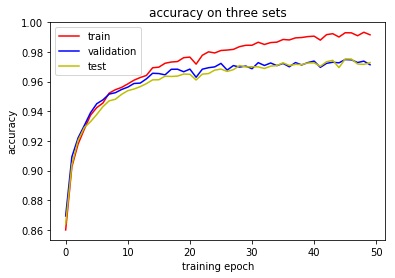

In [9]:
plt.figure(2)
ptr,=plt.plot(range(max_epoch),acc_train_his,'r-')
pva,=plt.plot(range(max_epoch),acc_val_his,'b-')
pte,=plt.plot(range(max_epoch),acc_test_his,'y-')
plt.xlabel('training epoch')
plt.ylabel('accuracy')
plt.title('accuracy on three sets')
plt.legend((ptr,pva,pte),('train','validation','test'))
plt.show()

# 3. Hard attention REINFORCE method (Glimpse Network)

In [ ]:
# parameters
batch_size=64
img_size=28
sensor_unit=256
lstm_size=256
N_glimpse=10
MC_test=128
loc_std=0.2
tot_size=batch_size*MC_test

In [ ]:
class Glimpse_Network():
    def __init__(self):
        self.glimspe_size=[5,7,9]
        self.concat_size=9
        self.img_net=tf.layers.Dense(units=sensor_unit,name='glimpse_net/img_net')
        self.loc_net=tf.layers.Dense(units=sensor_unit,name='glimpse_net/loc_net')
        
    def glimpse_sensor(self,image,loc):
        glimpses_list=[tf.image.extract_glimpse(input=image,size=[gs,gs],offsets=loc) for gs in self.glimspe_size]
        glimpses_norm=[tf.image.resize_bilinear(g,[self.concat_size,self.concat_size]) for g in glimpses_list]
        glimpses=tf.concat(values=glimpses_norm,axis=3)  # batch_size*concat_size*concat_size*3
        return glimpses
    
    def forward(self,image,loc):
        glimpses=self.glimpse_sensor(image,loc) # tot_size*concat_size*concat_size*3
        g_image=self.img_net(inputs=tf.layers.flatten(glimpses))
        g_loc=self.loc_net(inputs=loc)
        g_out=tf.nn.relu(g_image+g_loc)
        return g_out

In [ ]:
tf.reset_default_graph()
X=tf.placeholder(dtype=tf.float32,shape=[None,28,28,1])
y=tf.placeholder(dtype=tf.int64,shape=[None,10])
start_location=tf.random_uniform(shape=[tot_size,2],minval=-1.0,maxval=1.0)
gNet=Glimpse_Network()

lstm_cell = tf.contrib.rnn.LSTMCell(lstm_size)
state = lstm_cell.zero_state(tot_size, tf.float32)

emission_net=tf.layers.Dense(units=2,name='emission_net')
baseline_net=tf.layers.Dense(units=1,name='baseline_net')
predict_net=tf.layers.Dense(units=10,name='predict_net')

def loglikelihood(sample,mean):
    gaussian=tf.distributions.Normal(loc=mean,scale=tf.constant([loc_std,loc_std]))
    llh=-gaussian.log_prob(sample)
    return tf.reduce_sum(llh,axis=1)
    
loc_his=[]
loglikelihood_his=[]
baseline_his=[]
normalized_loc=start_location
for ng in range(N_glimpse):
    loc_his.append(normalized_loc)
    
    # extract glimpse
    glimpses_out=gNet.forward(X,normalized_loc)
    
    # RNN
    lstm_output,state=lstm_cell(glimpses_out,state)
    
    # emit mean of location
    loc_mean=emission_net(inputs=lstm_output)
    
    # sample next location by gaussian distribution centered at loc_mean
    loc_sample=tf.random_normal(shape=(tot_size,2),mean=loc_mean,stddev=loc_std)
    
    # calculate the -loglikelihood of the sampled position
    llh=loglikelihood(loc_sample,loc_mean)
    loglikelihood_his.append(llh)
    
    # normalize the location for next input
    normalized_loc=tf.tanh(loc_sample)
    
    # output time independent baseline
    baseline=baseline_net(inputs=lstm_output)
    baseline_his.append(tf.squeeze(baseline))

# pack data for calculation
baseline_his=tf.stack(baseline_his)
loglikelihood_his=tf.stack(loglikelihood_his)

# make prediction
score=predict_net(inputs=lstm_output)
prediction=tf.argmax(score,1)

# calculate reward, do variance reduction and calculate reinforced loglikelihood
reward=tf.cast(tf.equal(prediction,tf.argmax(y,1)),dtype=tf.float32)
reduce_var_reward=reward-tf.stop_gradient(baseline_his)
reinforce_llh=tf.reduce_mean(loglikelihood_his*reduce_var_reward)

# regression baseline towards reward
baseline_mse=tf.reduce_mean(tf.square(reward-baseline_his))

# softmax to output
softmax_loss=tf.reduce_mean(tf.losses.softmax_cross_entropy(onehot_labels=y,logits=score))

# summarize loss
loss=reinforce_llh+baseline_mse+softmax_loss


optimizier=tf.train.AdamOptimizer(learning_rate=1e-6)
train_step = optimizier.minimize(loss)

In [ ]:
max_epoch=100
print_every=50
num_iteration=num_train//batch_size
loss_his=[]

with tf.Session() as sess:
#     print(tf.global_variables())
    tf.global_variables_initializer().run()
    for epoch in range(max_epoch):
        print(time.strftime('%Y-%m-%d %H:%M:%S',time.localtime(time.time())),'start epoch %d/%d' % (epoch+1,max_epoch))
        tot_loss=0
        for it in range(num_iteration):
            images,labels=mnist.train.next_batch(batch_size)
            # prepare data for monte carlo test
            images=np.tile(images,(MC_test,1))
            labels=np.tile(labels,(MC_test,1))
            feed_dict={X:images.reshape(tot_size,28,28,1),y:labels}
            loss_1,loss_2,loss_3,loss_out,_=sess.run([reinforce_llh,baseline_mse,softmax_loss,loss,train_step],
                                                     feed_dict=feed_dict)
            tot_loss+=loss_out
            if it==0 or (it+1)%print_every==0 or it==num_iteration-1:
                print(time.strftime('%Y-%m-%d %H:%M:%S',time.localtime(time.time())),
                      'iter',it+1,': loss_1 =',loss_1,'loss_2 =',loss_2,'loss_3 =',loss_3,'total_loss =',loss_out)
        loss_his.append(tot_loss/num_iteration)
        print(time.strftime('%Y-%m-%d %H:%M:%S',time.localtime(time.time())),
              'end epoch, average loss =',(tot_loss/num_iteration))

In [ ]:
plt.figure(2)
ptr,=plt.plot(range(max_epoch),loss_his)
plt.xlabel('training epoch')
plt.ylabel('loss')
plt.show()

In [ ]:
# mean=tf.zeros((100,2),dtype=tf.float32)
# std=tf.constant([1,1],dtype=tf.float32)
# gaussian=tf.distributions.Normal(loc=mean,scale=std)
# rand=tf.random_normal(shape=(100,2),mean=0,stddev=1)
# sampled=mean+rand
# prob=-gaussian.log_prob(sampled)
# prob=tf.reduce_mean(tf.reduce_sum(prob,1))
# with tf.Session() as sess:
#     out=sess.run([prob])
#     print(out)